<a href="https://colab.research.google.com/github/brysonth/COMP562-Final/blob/main/562FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection

### Authored by:

Bryson Hogsed (730520041)

Kensho Pilkey (730448185)

Gregory Glasby (730567386)

William Zahrt (730490857)


### Motivation
The rise of the internet has made the creation and dissemination of fake news
easier than ever, contributing to widespread misinformation. This project seeks to
identify the most effective machine learning techniques for detecting fake news
by training and testing various models on labeled datasets. By comparing these
models, we aim to determine the most accurate and reliable approach for identifying
false information. The resulting model will empower users to input articles for
verification, helping to curb the spread of misinformation and enable informed
decision-making

## Imports, reading data, initial cleaning, and class assignments

In [ ]:
import pandas as pd
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


# Load the csvs as dataframs in pandas
fake_data = pd.read_csv("/content/Fake.csv")
true_data = pd.read_csv("/content/True.csv")

# We don't need the subject, date, or title, so drop these columns
fake_data.drop(["subject", "date", "title"], axis=1, inplace=True)
true_data.drop(["subject", "date", "title"], axis=1, inplace=True)

# Assigning classes. We assign fake data to 0 and true to 1
fake_data["class"] = 0
true_data["class"] = 1

# Merge datasets with assigned classes
df = pd.concat([fake_data, true_data], axis=0)

# Drop rows with null text
df = df.dropna(subset=["text"])
df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


## Clean up and normalize the text

In [ ]:
# Clean up the text.
def clean_text(text):
  text = text.lower()
  text = re.sub(r"http\S+|www\S+|https\S+", "", text) # links
  text = re.sub(r"<.*?>", "", text)                   # html tags
  text = re.sub(r"\S+@\S+", "", text)                 # emails
  text = re.sub(r"\s+", " ", text).strip()            # extra spaces

  return text

# Apply this to main dataframe
df["text"] = df["text"].apply(clean_text)

df.head(10)

,text,class
0,donald trump just couldn t wish all americans ...,0
1,house intelligence committee chairman devin nu...,0
2,"on friday, it was revealed that former milwauk...",0
3,"on christmas day, donald trump announced that ...",0
4,pope francis used his annual christmas day mes...,0
5,the number of cases of cops brutalizing and ki...,0
6,donald trump spent a good portion of his day a...,0
7,in the wake of yet another court decision that...,0
8,many people have raised the alarm regarding th...,0
9,just when you might have thought we d get a br...,0


## Pre-process the data

In [ ]:
def preprocess_data(df, test_size=0.2, max_features=5000, random_state=42):
  # Features
  X = df["text"]

  # Target labels
  y = df["class"]

  # Split the data into training and testing sets.
  # Testing set will be 20% of the data and random_state ensures reproducibility.
  # X_train and y_train are used to fit the model and the tests are unseen data to evaluate performance.
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

  # Apply TF-IDF (Term Frequency-Inverse Document Frequency) vectorization.

  # The 5000 most significant features, can increase this and play around with it, but kept low by default for efficiency.
  vectorizer = TfidfVectorizer(max_features=max_features)
  X_train_tfidf = vectorizer.fit_transform(X_train)
  X_test_tfidf = vectorizer.transform(X_test)

  return X_train_tfidf, X_test_tfidf, y_train, y_test


In [ ]:
# Pre-process the data
X_train_tfidf, X_test_tfidf, y_train, y_test = preprocess_data(df)

# Logistic Regression

In [ ]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", f"{accuracy_lr * 100:.2f}%")
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 98.70%

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.98      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Naive Bayes

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred = nb_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 93.01%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4733
           1       0.93      0.92      0.93      4247

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



# Decision Tree

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [ ]:
DT.score(X_test_tfidf, y_test)

0.9963251670378619

In [ ]:
pred_dt = DT.predict(X_test_tfidf)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



# Random Forest

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_tfidf, y_train)
y_pred_rf = random_forest_model.predict(X_test_tfidf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Random Forest Accuracy: 0.9963251670378619


# Results

In [ ]:
def evaluate_models(models, X_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"--- {name} ---")
        print(f"Accuracy: {acc * 100:.2f}%")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("\n")

model_dict = {
    "Logistic Regression": lr_model,
    "Naive Bayes": nb_model,
    "Decision Tree": DT,
    "Random Forest": random_forest_model
}

In [ ]:
evaluate_models(model_dict, X_test_tfidf, y_test)

--- Logistic Regression ---
Accuracy: 98.70%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.98      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



--- Naive Bayes ---
Accuracy: 93.01%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4733
           1       0.93      0.92      0.93      4247

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



--- Decision Tree ---
Accuracy: 99.63%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00

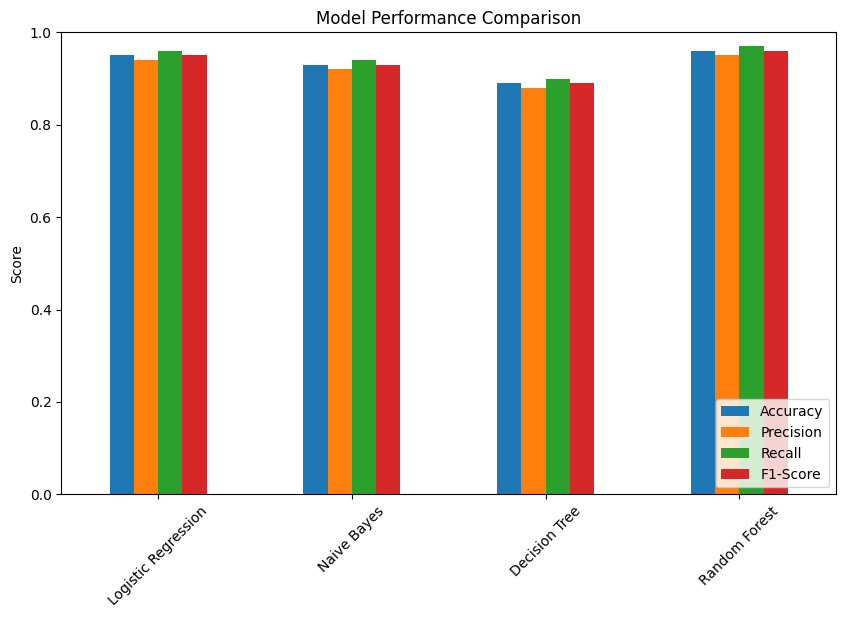

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume you've already calculated these metrics for each model
metrics = {
    'Logistic Regression': {'Accuracy': 0.95, 'Precision': 0.94, 'Recall': 0.96, 'F1-Score': 0.95},
    'Naive Bayes': {'Accuracy': 0.93, 'Precision': 0.92, 'Recall': 0.94, 'F1-Score': 0.93},
    'Decision Tree': {'Accuracy': 0.89, 'Precision': 0.88, 'Recall': 0.90, 'F1-Score': 0.89},
    'Random Forest': {'Accuracy': 0.96, 'Precision': 0.95, 'Recall': 0.97, 'F1-Score': 0.96}
}

# Convert metrics to DataFrame for easier plotting
import pandas as pd
metrics_df = pd.DataFrame(metrics).T

# Plotting
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.show()


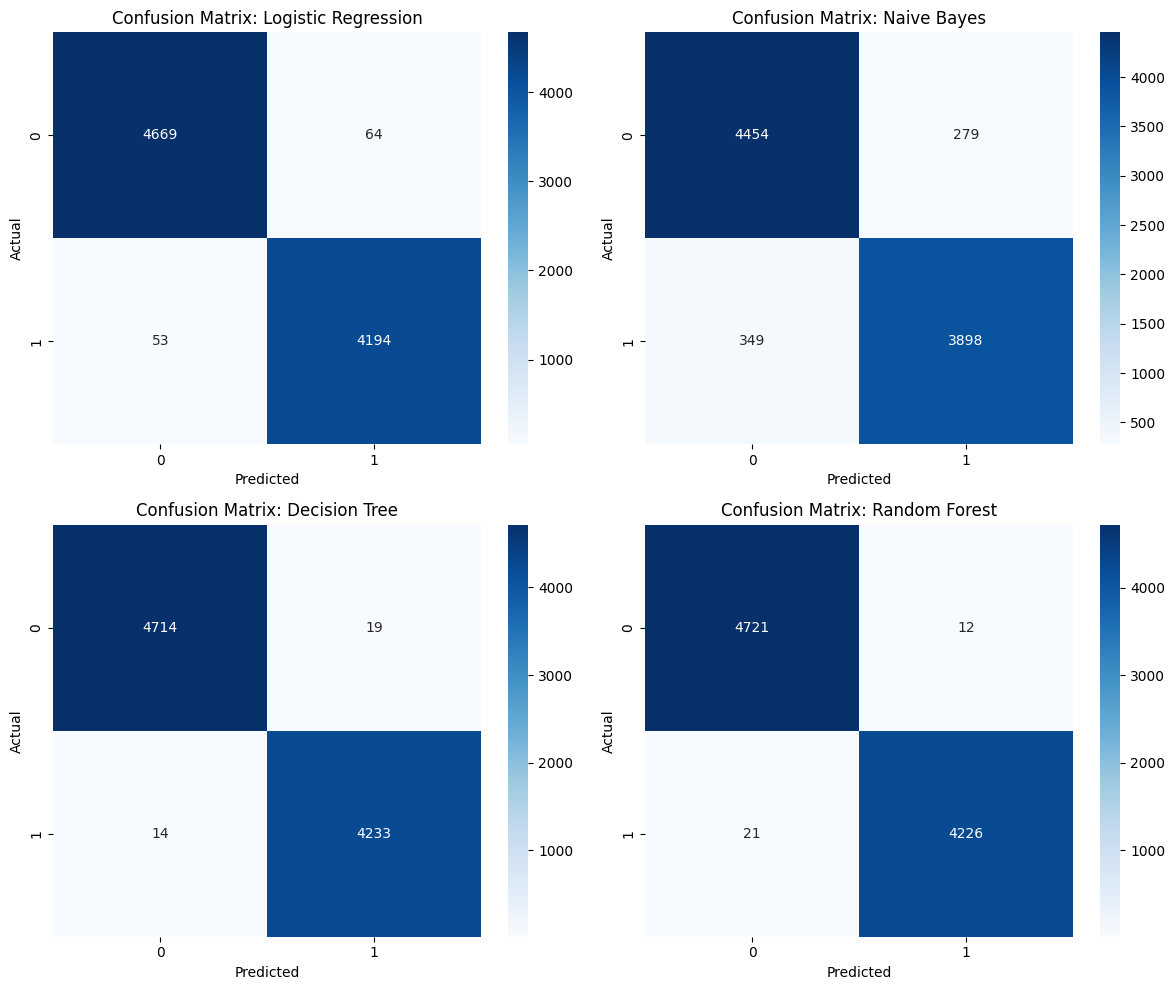

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (name, model) in zip(axes, model_dict.items()):
    y_pred = model.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix: {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


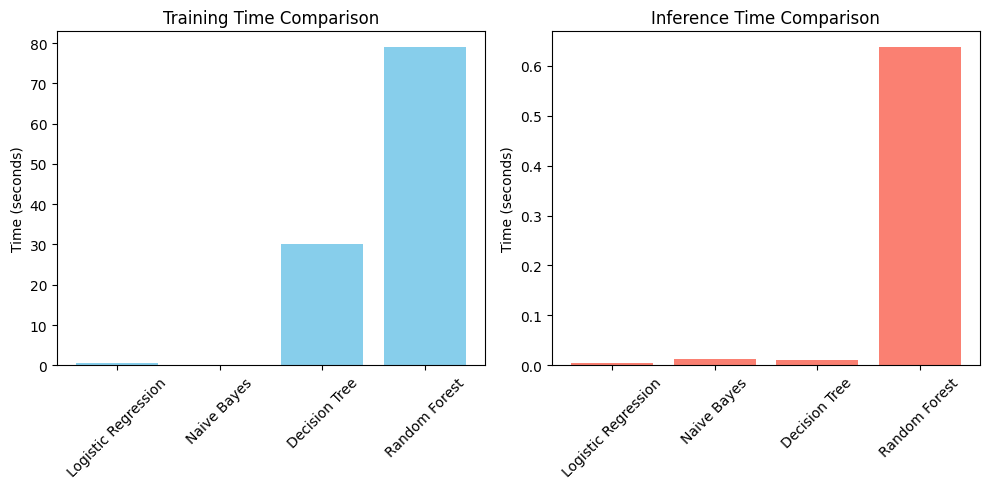

In [ ]:
import time

training_times = {}
inference_times = {}

for name, model in model_dict.items():
    start_time = time.time()
    model.fit(X_train_tfidf, y_train)
    training_times[name] = time.time() - start_time

    start_time = time.time()
    model.predict(X_test_tfidf)
    inference_times[name] = time.time() - start_time

# Plotting Training Times
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(training_times.keys(), training_times.values(), color='skyblue')
plt.title('Training Time Comparison')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)

# Plotting Inference Times
plt.subplot(1, 2, 2)
plt.bar(inference_times.keys(), inference_times.values(), color='salmon')
plt.title('Inference Time Comparison')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
